# Practica 2
## Global Descriptors

Esta práctica tiene dos objetivos. Primero, aprender a manipular imagenes en escala de grises. En
particular, aprender a tratarlas como matrices de 2 dimensiones. Segundo, repasar los conceptos del
descriptor global HOG visto en clase, y aprender a usar su implementación incluida en skimage.
Para esta práctica se utilizará el dataset Olivetti faces, y la función HOG de skimage.feature.

#### Computer Vision - Session 06.
Computer Science, ITAM.

February 11th, 2019
Paola Mejia



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.datasets import fetch_olivetti_faces

#Extra libraries
from math import sqrt
import seaborn as sns

In [2]:
hog?

In [2]:
# Load info
OLIVETTI = fetch_olivetti_faces(shuffle=True)
X = OLIVETTI.images
Y = OLIVETTI.target 
#Son 400 etiquetas entre 0-40
#Base de datos 400 fotos, 10 por persona, de 40 personas
print(X.shape)
print(Y.shape)
print(X.min())
print(X.max())

(400, 64, 64)
(400,)
0.0
1.0


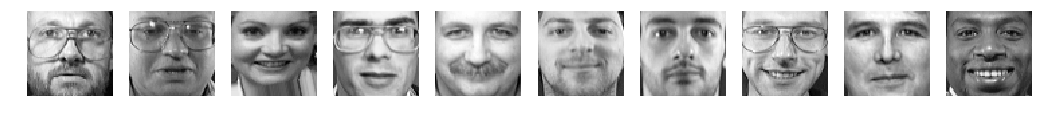

In [3]:
# Show some examples
n = 10
plt.figure(figsize=(18, 12))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X[i], cmap='gray')
    ax.axis('off')
plt.show()

In [4]:
# Print some target (label) examples
print(Y[:10])

[13 30 34 19 24  6 15 26 14 21]


(64, 64)
0.24153927
0.7462399


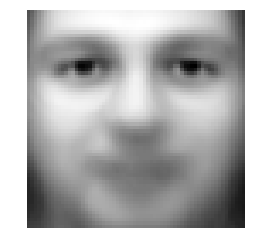

In [5]:
# Average image across full collection
meanX = X.mean(axis=0) #Matriz de 64 x 64, promedio pixel a pixel sobre todas las imagenes
print(meanX.shape)
print(meanX.min())
print(meanX.max())
plt.imshow(meanX, cmap='gray')
plt.axis('off')
plt.show() #Rostro promedio

#### 1. Calcula y muestra la imagen promedio por cada clase del dataset Olivetti faces

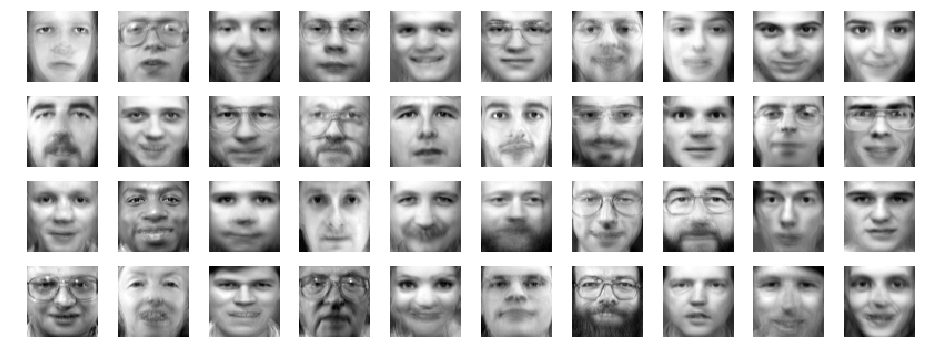

In [6]:
# Average image per class
plt.figure(figsize=(16, 6))

for it_cl in range(np.max(Y)+1):
    meanXcl =  X[Y == it_cl].mean(axis=0)
    ax = plt.subplot(4, 10, it_cl + 1)
    plt.imshow(meanXcl, cmap='gray')
    ax.axis('off')
    it_cl = it_cl + 1
plt.show()

#### 2. Implementa una funcion que tome como entrada dos imagenes y devuelta un escalar que represente la distancia euclideana entre ellas.

In [7]:
def euclidean_dist(img1, img2):
    # alternative sqrt(np.sum((img1-img2)**2))
    return np.linalg.norm(img1-img2)

#### 3. Usa la funcion anterior para calcular la distancia entre la imagen promedio de cada clase respecto a la imagen promedio de toda la coleccion

In [8]:
num_faces = 40
dist_avg = np.zeros((num_faces, 1))

for it_cl in range(num_faces):
    meanXcl =  X[Y == it_cl].mean(axis=0)
    dist_avg[it_cl] =  euclidean_dist(meanX,meanXcl)

#Alternative
#plt.hist([euclidean_dist(meanX,X[Y == it_cl].mean(axis=0)) for it_cl in range(num_faces)],bins=10)

#### 4. Crea y grafica una distibucion de 10 intervalos para las distancias calculadas en el punto anterior.

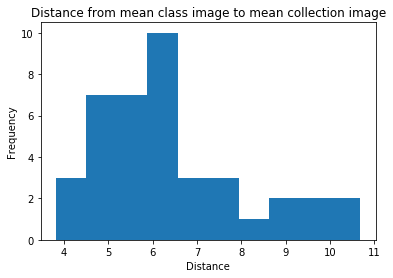

In [9]:
plt.hist(dist_avg,bins=10)
plt.title("Distance from mean class image to mean collection image")
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

#### 5. Ahora que ya sabes calcular distancias entre imagenes, calcula la distancia de cada imagen respecto a las otras 399 images. Crea una matriz de distancias promedio (idea similar a la matriz de confusion vista en clase), la cual contenga 40 filas y 40 columnas, una por clase. Cada elemento de la matriz debe indicar la distancia promedio entre los elementos de dos clases. Ej., la celda (1, 2) indica el promedio de las distancias de todas las imagenes de la clase 1 respecto a todas las imagenes de la clase 2.


In [37]:
# Distance Matrix. Only the upper triangle is calculated. 
num_faces = 40
num_elem_per_class = 10
dist_matrix2 = np.zeros((num_faces, num_faces))

for row in range(num_faces):
    row_cl =  X[Y == row]   
    for col in range(row+1, num_faces):
        col_cl =  X[Y == col]
        dist_elem = np.zeros((num_elem_per_class ,num_elem_per_class ))
        for i in range(num_elem_per_class ):
            for j in range(i , num_elem_per_class):
                dist_elem[i][j] =  euclidean_dist(row_cl[i],col_cl[j]) #Only upper triangle is calculated
                
        dist_matrix2[row][col] =  np.sum(dist_elem)/sum(range(num_elem_per_class+1)) #Mean for upper triangle of array
        dist_matrix2[col][row] =  np.sum(dist_elem)/sum(range(num_elem_per_class+1))
        

#distance = np.array([[euclidean_dist(row_cl[i],col_cl[j]) for i in range(num_elem_per_class)] for j in range(num_elem_per_class)]).mean()

#### 6. Muestra la matriz como una imagen de colores. Usa el mapa de colores 'jet' que va de azul (distancia muy corta) a rojo (distancia muy grande).

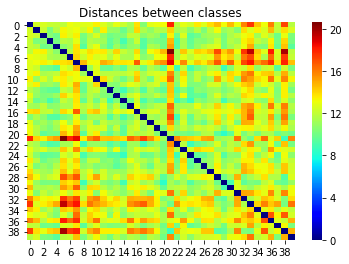

In [38]:
m = sns.heatmap(dist_matrix2, cmap = 'jet')
plt.title("Distances between classes")
plt.show(m)

#### 7. Utiliza la funcion HOG de skimage.feature para calcular un desriptor global (HOG) por imagen

(2916,)
(64, 64)


C:\Users\pmeji\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


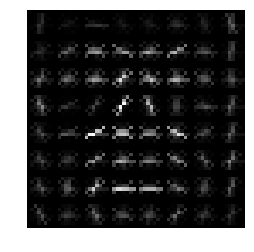

In [39]:
# First image example
hog_descr, hog_img = hog(X[0], visualize=True)
print(hog_descr.shape)
print(hog_img.shape)
plt.imshow(hog_img, cmap='gray')
plt.axis('off')
plt.show()

In [40]:
num_pic = X.shape[0]

test_descr, test_img = hog(X[0], visualize=True)
size_descr = test_descr.shape[0]
size_img = test_img.shape[0]

hog_descr= np.zeros((num_pic, size_descr))
hog_img= np.zeros((num_pic, size_img, size_img))

for i in range(num_pic): 
    hog_descr[i], hog_img[i] = hog(X[i], visualize=True)

C:\Users\pmeji\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


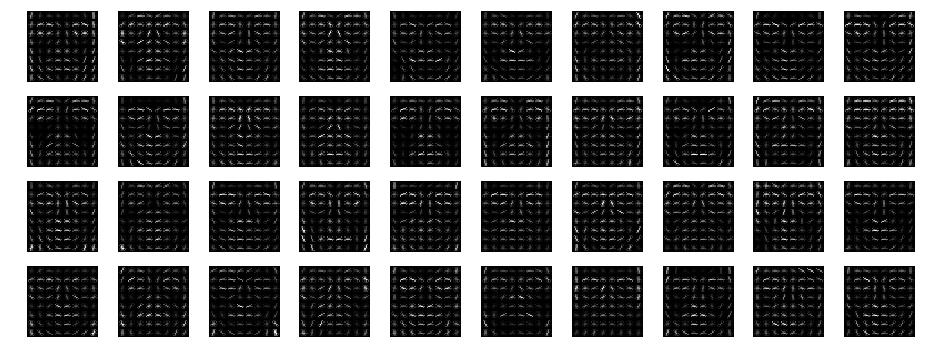

In [41]:
# All HOG descriptors 
plt.figure(figsize=(16, 6))

for i in range(num_faces): 
    meanXcl =  hog_img[Y == i].mean(axis=0)
    ax = plt.subplot(4, 10, i + 1)
    plt.imshow(meanXcl, cmap='gray')
    ax.axis('off')
plt.show()

#### 8. ¿Porqué es distinta su dimensionalidad respecto a la vista en clase?

La dimensionalidad de nuestro vector es 2916, lo cual es diferente al vector  de 3780 visto en clase.

El vector de 3780-D se construyó moviendo 8 pixeles a la vez en un espacio de 64x128. Esto resultó en 7 pasos horizontales y 15 pasos verticales (105 bloques sobrepuestos). 

Sin embargo, como visto en clase (Diapositiva 20 Global Descriptors) existen muchas combinaciones posibles dependiendo del tamaño de la celda (pixeles) de los bloques y de la imagen.

Para empezar la imagen es de 64x64 pixeles en vez de 64x128. Asimismo, el método hog de sklearn tiene como parametros los pixeles por celda y las celdas por bloque. Por default usa bloques de 3x3 y celdas de 8x8, lo cual es distinto a los valores vistos en clase con bloques de 2x2. 

Si cambiamos el tamaño de la imagen a 64x128 y cambiamos el número de celdas por bloques de 3x3 a 2x2 entonces obtenemos el vector de dimensión 3780-D

In [116]:
# Original
print("HOG without parameters")
hog_descr, hog_img = hog(X[0], visualize=True)
print(hog_descr.shape)
print(hog_img.shape)

# HOG with default parameters
print("\n", "HOG with default parameters")
hog_descr1, hog_img1 = hog(X[0],pixels_per_cell=(8, 8),
                        cells_per_block=(3, 3), visualize=True)
print(hog_descr1.shape)
print(hog_img1.shape)

# HOG with lecture's parameters and lecture's image size
ap =np.reshape(np.append(X[1],X[0]), (64,128))
print("\n", "HOG with lecture's parameters and lecture's image size")
hog_descr2, hog_img2 = hog(ap, cells_per_block=(2, 2), visualize=True)
print(hog_descr2.shape)
print(hog_img2.shape)


HOG without parameters
(2916,)
(64, 64)

 HOG with default parameters
(2916,)
(64, 64)

 HOG with lecture's parameters and lecture's image size
(3780,)
(64, 128)


C:\Users\pmeji\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


#### 9. Construye otra matriz de distancias promedio (similar a la del punto 5) de 40x40, pero ahora usando la distancia euclideana promedio entre los descriptores HOG calculados en el punto anterior

In [42]:
# Distance Matrix. Only the upper triangle is calculated. 
num_faces = 40
num_elem_per_class = 10
dist_hog = np.zeros((num_faces, num_faces))
        
for row in range(num_faces):
    row_cl =  hog_descr[Y == row]   
    for col in range(row+1, num_faces):
        col_cl =  hog_descr[Y == col]
        dist_elem = np.zeros((num_elem_per_class ,num_elem_per_class ))
        for i in range(num_elem_per_class ):
            for j in range(i , num_elem_per_class):
                dist_elem[i][j] =  euclidean_dist(row_cl[i],col_cl[j]) #Only upper triangle is calculated
                
        dist_hog[row][col] =  np.sum(dist_elem)/sum(range(num_elem_per_class+1)) #Mean for upper triangle of array
        dist_hog[col][row] =  np.sum(dist_elem)/sum(range(num_elem_per_class+1))
        


#### 10. Muestra la nueva matriz también usando el mapa de colores jet

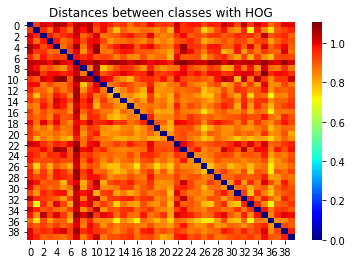

In [43]:
hm = sns.heatmap(dist_hog, cmap = 'jet')
plt.title("Distances between classes with HOG")
plt.show(hm)

#### 11. ¿Notas alguna diferencia significativa entre las distancias calculadas usando intensidades crudas respecto a las distancias calculadas usando descriptores HOG?


Las distancias calculadas usando descriptores HOG parecen ser menores a las distancias calculadas usando intensidades crudas. Esto se puede ver en la escala de los mapas de calor. La escala usando descriptores HOG va de 0 a 1 mientras que la escala con las intensidades crudas va de 0 a 20. 

Sin embargo, en el mapa de calor usando intensidades crudas predominan los colores amarillo y azul claro representando distancias medias entre clases. Esto se puede interpretar como que las distancias entre clases no son claras. En contraste, en el mapa de calor usando descriptores HOG predominda el color rojo que identifica mayor distancia entre clases (dentro de la escala). En este caso, se puede interpretar como que el descriptor HOG hace un mejor trabajo distinguiendo una clase de otra. 

In [49]:
print("Before using HOG")
print("Mean distance: ",np.mean(dist_matrix2))
print("Maximum distance: ",np.max(dist_matrix2))
np.std(dist_matrix2)

print("\n", "Using HOG")
print("Mean distance: ",np.mean(dist_hog))
print("Maximum distance: ",np.max(dist_hog))

Before using HOG
Mean distance:  12.066406067609787
Maximum distance:  20.599261474609374

 Using HOG
Mean distance:  0.8855307813086516
Maximum distance:  1.1047736809957678


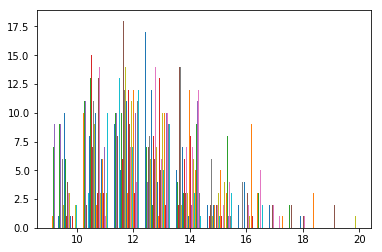

In [45]:
plt.hist(dist_matrix2, range = [9,20])
plt.show()

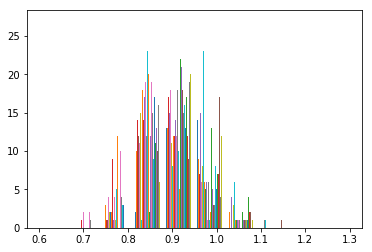

In [46]:
plt.hist(dist_hog, range=[0.6,1.3])
plt.show()

#### References

http://scikit-image.org/docs/dev/api/skimage.feature.htmlhttp://scikit-image.org/docs/dev/api/skimage.feature.html

https://www.learnopencv.com/histogram-of-oriented-gradients/

Lecture notes.
